<a href="https://colab.research.google.com/github/gwnwytt/GwenWyattDTSC3020Fall2025/blob/main/Final_Exam_gw0183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC 3020 – Introduction to Python Programming   
# Final Exam – Part 2: Programming Section  

Total Questions: 5

Total Points: 80

**Instructions:**
- Answer all programming questions in this section.
- Write clean, readable code and include comments where helpful.



#**Q1 (Chapters 1–7 )**
**Points:** 20

### **Course Load Summary Program**

Write a Python program that collects information about a student's courses and reports their total course load and enrollment status.

Your program must do all of the following:

### **1. Data Collection**

* Create an empty list named `courses`.
* Repeatedly ask the user for:

  * the course name
  * the number of credits for that course
* Stop collecting courses when the user enters `"done"` (in any capitalization) for the course name.
* For each course, create a dictionary containing the course name and its credit hours. Append each dictionary to the `courses` list.

### **2. Total Credit Calculation**

* After input is complete, compute the total number of credits by iterating through the `courses` list and summing the credit values.
* Store the result in the variable `total_credits`.

### **3. Enrollment Status**

Using `if`/`elif`/`else`, classify the student:

* Fewer than 12 credits → `"Part-time student"`
* Between 12 and 18 credits (inclusive) → `"Full-time student"`
* More than 18 credits → `"Overload"`

Print the correct classification.

### **4. Summary Output**

* Print how many courses were entered and the total number of credits.
* Print each course on its own line using the format:
  `CourseName — X credits`

### **5. Edge Case**

* If no courses are entered, print `"No courses entered."` and do not compute totals or status.


In [6]:
# write your answer here

courses = []
user_input = input("Enter course name (or 'done' to finish): ")
while user_input.lower() != "done":
  credits = int(input("Enter the number of credits for the course: "))
  courses.append({"Course name": user_input, "Credits": credits})
  user_input = input("Enter course name (or 'done' to finish): ")

if not courses:
  print("No courses entered.")
else:
  total_credits = sum(course["Credits"] for course in courses)
  if total_credits < 12:
    enrollment_status = "Part-time student"
  elif total_credits <= 18:
    enrollment_status = "Full-time student"
  else:
    enrollment_status = "Overload"

  print(f"Number of courses entered: {len(courses)}")
  print(f"Total number of credits: {total_credits}")
  for course in courses:
    print(f"{course['Course name']} - {course['Credits']} credits")
  print(f"Enrollment status: {enrollment_status}")


Enter course name (or 'done' to finish): Done
No courses entered.


# **Q2 – Data Visualization with Matplotlib (24 points)**

In this question, you will analyze penguin body measurements using the **penguins dataset** and create multiple visualizations using **Matplotlib**.
Your goal is to explore distribution and population counts across categorical groups.
You must write Python code that **runs without error** and produces the requested plots.

---

### **Dataset**

Run this code first to load the dataset:

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")
df = df.dropna(subset=["species", "bill_length_mm", "flipper_length_mm"])
df.head()
```

You will work with the DataFrame named **df**.

---

## **Your Task**

You may create each plot in a separate figure. Use Matplotlib functions (e.g., `plt.figure()`, `plt.boxplot()`, `plt.bar()`, etc.) to generate the required visualizations.

---

### **1) Boxplot of Bill Length Across Species (8 points)**

Create a boxplot to compare the distribution of `bill_length_mm` among different penguin species.

**Requirements:**

| Feature     | Must include                          |
| ----------- | ------------------------------------- |
| x-axis      | species                               |
| y-axis      | bill_length_mm                        |
| Title       | `Bill Length Distribution by Species` |
| Axis labels | clearly shown                         |

---

### **2) Bar Chart Showing Penguins per Species (8 points)**

Create a bar chart that displays how many penguins belong to each species.

You may find it helpful to use:

```python
df["species"].value_counts()
```

**Requirements:**

| Feature | Must include               |
| ------- | -------------------------- |
| x-axis  | species                    |
| y-axis  | penguin count              |
| Title   | `Penguin Count by Species` |

---

### **3) Bar Chart Showing Penguins per Island (8 points)**

Create a second bar chart showing how many penguins were recorded on each island.

You may find it helpful to use:

```python
df["island"].value_counts()
```

**Requirements:**

| Feature | Must include              |
| ------- | ------------------------- |
| x-axis  | island                    |
| y-axis  | penguin count             |
| Title   | `Penguin Count by Island` |

---

At the end of your code, make sure all figures are displayed using:

```python
plt.show()


In [15]:
# Write your answer here
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")
df = df.dropna(subset=["species", "bill_length_mm", "flipper_length_mm"])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


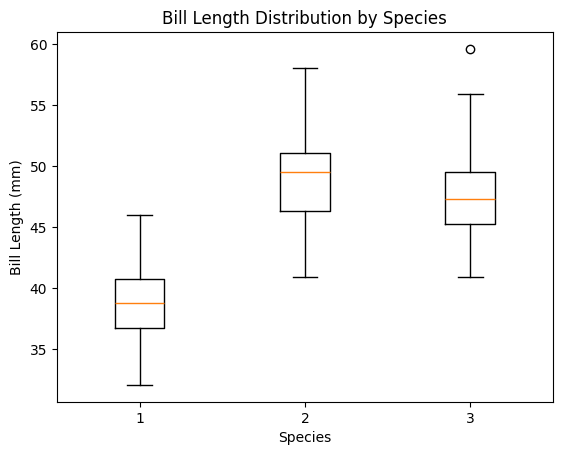

In [13]:
#1
species_names = df['species'].unique()
data_to_plot = [df['bill_length_mm'][df['species'] == species] for species in species_names]

plt.boxplot(data_to_plot)
plt.title("Bill Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")
plt.show()

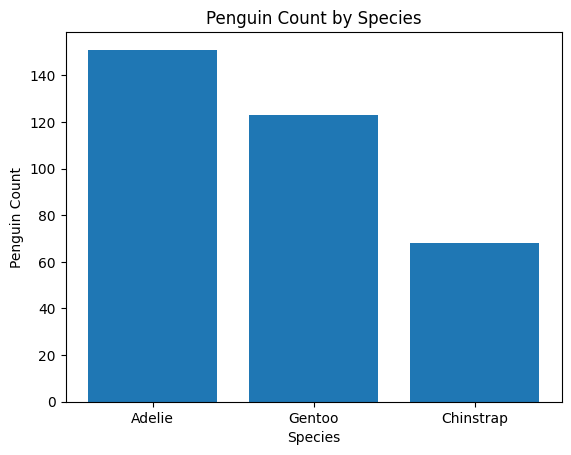

In [14]:
#2
species_count = df["species"].value_counts()
plt.bar(species_count.index, species_count.values)
plt.title("Penguin Count by Species")
plt.xlabel("Species")
plt.ylabel("Penguin Count")
plt.show()


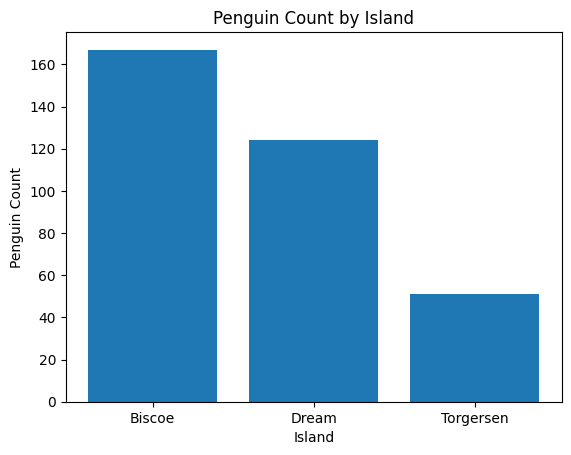

In [16]:
#3
island_count = df["island"].value_counts()
plt.bar(island_count.index, island_count.values)
plt.title("Penguin Count by Island")
plt.xlabel("Island")
plt.ylabel("Penguin Count")
plt.show()

# **Q3 – Web Scraping with BeautifulSoup (16 points)**

### **Books to Scrape – Static Web Scraping Exercise**

You will write Python code that scrapes book information from a static website.
Your code must run and produce structured output.

You will scrape Page 1 of:

```
https://books.toscrape.com/catalogue/page-1.html
```

Each book listing contains:

* Title
* Price
* Availability status
* Star rating (stored inside the class attribute)

---

## **Your Task**

### **1) Fetch & parse the webpage (6 points)**

Write code to:

* Retrieve the HTML using `requests.get()`
* Parse it using `BeautifulSoup`
* Extract all book containers using the class name `"product_pod"`

---

### **2) Extract information from each book (10 points)**

For each book container, extract:

| Field        | Example Output                                           |
| ------------ | -------------------------------------------------------- |
| Title        | `A Light in the Attic`                                   |
| Price        | `£53.74`                                                 |
| Availability | `In stock`                                               |
| Star rating  | `Three`, `Five`, etc. (from `<p class="star-rating X">`) |

Store results in a **list of dictionaries**, then convert it into a pandas DataFrame named `df`.

Finally, **print the DataFrame** as your output.


In [19]:
# You may use the skeleton below by filling in the blanks.

import requests
from bs4 import BeautifulSoup
import pandas as pd

# 1) Fetch & parse the webpage
url = "https://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract all book containers (elements with class "product_pod")
book_items = soup.find_all("article", class_="product_pod")

records = []

# 2) Extract information from each book
for item in book_items:
    # Title
    title = item.h3.a["title"].strip()

    # Price (e.g., "£53.74")
    price = item.find("p", class_="price_color").get_text(strip=True)

    # Availability (e.g., "In stock")
    availability = item.find("p", class_="instock availability").get_text(strip=True)

    # Star rating from class list: ["star-rating", "Three"]
    rating_classes = item.find("p", class_="star-rating")["class"]
    rating = [c for c in rating_classes if c != "star-rating"][0]

    records.append({
        "Title":        title,
        "Price":        price,
        "Availability": availability,
        "Rating":       rating
    })

# Convert to DataFrame
df = pd.DataFrame(records)

# Display the completed DataFrame
print(df)


                                                Title    Price Availability  \
0                                A Light in the Attic  Â£51.77     In stock   
1                                  Tipping the Velvet  Â£53.74     In stock   
2                                          Soumission  Â£50.10     In stock   
3                                       Sharp Objects  Â£47.82     In stock   
4               Sapiens: A Brief History of Humankind  Â£54.23     In stock   
5                                     The Requiem Red  Â£22.65     In stock   
6   The Dirty Little Secrets of Getting Your Dream...  Â£33.34     In stock   
7   The Coming Woman: A Novel Based on the Life of...  Â£17.93     In stock   
8   The Boys in the Boat: Nine Americans and Their...  Â£22.60     In stock   
9                                     The Black Maria  Â£52.15     In stock   
10     Starving Hearts (Triangular Trade Trilogy, #1)  Â£13.99     In stock   
11                              Shakespeare's Sonnet

# **Q4 – Regex + Exception Handling (12 points)**

You are given the following list of strings already defined in your code:

```python
users = [
    "Alice | alice@gmail.com | 123-456-7890 | 29",
    "Bob | bob_at_gmail.com | 111-222-3333 | twenty",
    "Cathy | cathy@yahoo.com | (123) 555-9999 | 101",
    "David | david@company | 999 888 7777 | -5",
    "Emma | emma@outlook.com | 123-456-7890 | 45"
]
```

Each string *should* represent:

```
Name | Email | Phone | Age
```

Your task is to **clean, validate, and filter** these records using **regular expressions** and **exception handling**.

---

## Part A — Clean & Validate Users (7 points)

Write a function named `clean_users(user_list)` that:

1. Splits each record into four fields using `"|"`
   (ensure each field is stripped of surrounding spaces).

2. Validates each field:

| Field     | Rules                                                                                                |
| --------- | ---------------------------------------------------------------------------------------------------- |
| **Email** | must match pattern `something@something.something` using **regex**                                   |
| **Phone** | must match *only* one of these formats:<br> `123-456-7890` <br> `(123) 456-7890` <br> `123 456 7890` |
| **Age**   | convert with `try/except`, must be **0–120 inclusive**                                               |

3. Return a dictionary structured like:

```python
{
    "valid":   [ { "name": ..., "email": ..., "phone": ..., "age": ... }, ... ],
    "invalid": [ original_string1, original_string2, ... ]
}
```

A record is valid only if **all fields pass**.

---

## Part B — Count Valid vs Invalid (2 points)

After calling:

```python
result = clean_users(users)
```

Print:

```
Valid users: X
Invalid users: Y
```

(where `X` and `Y` are the correct totals)

---

## Part C — Find Gmail Users (3 points)

Using only users from `result["valid"]`:

Print all users whose email ends with `"gmail.com"` in this format:

```
Gmail user: Name (email)
```

You may use `.endswith("gmail.com")` or regex.





In [21]:
### You may use the skeleton below by filling in the blanks:
import re
users = [
    "Alice | alice@gmail.com | 123-456-7890 | 29",
    "Bob | bob_at_gmail.com | 111-222-3333 | twenty",
    "Cathy | cathy@yahoo.com | (123) 555-9999 | 101",
    "David | david@company | 999 888 7777 | -5",
    "Emma | emma@outlook.com | 123-456-7890 | 45"
]


def clean_users(user_list):

    result = {"valid": [], "invalid": []}

    email_pattern = r"^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$"
    phone_pattern = r"^\d{3}[-\s]?\d{3}[-\s]?\d{4}$"

    for record in user_list:
        parts = [p.strip() for p in record.split("|") ]

        if len(parts) != 4:
            result["invalid"].append(record)
            continue

        name, email, phone, age_str = parts

        if not re.fullmatch(email_pattern, email):
            result["invalid"].append(record)
            continue

        if not re.fullmatch(phone_pattern, phone):
            result["invalid"].append(record)
            continue

        try:
            age = int(age_str)
            if not (0 <= age <= 120):
                raise ValueError
        except:
            result["invalid"].append(record)
            continue

        result["valid"].append({
            "name":  name,
            "email": email,
            "phone": phone,
            "age":   age_str
        })

    return result


result = clean_users(users)
print("Valid users:",   len(result["valid"]) )
print("Invalid users:", len(result["invalid"]) )

for user in result["valid"]:
    if user["email"].endswith("gmail.com"):
        print(f"Gmail user: { user["name"] } ({ user["email"] })")


Valid users: 2
Invalid users: 3
Gmail user: Alice (alice@gmail.com)


#**Q5 – Streamlit Grade Filter App (16 points)**
bold text
> **Note:**
> You do **NOT** need to run this Streamlit app.
> Just write the correct Python code.
> Assume that `streamlit` and `pandas` are already installed.

Create a small Streamlit web application that filters students by their grades.

---

### **Step 1 – Create the Data (4 points)**

At the top of your code:

1. Import the libraries:

```python
import streamlit as st
import pandas as pd
```

2. Create a pandas DataFrame named `df` with the following data:

| Name  | Math | Science |
| ----- | ---- | ------- |
| Alice | 90   | 85      |
| Bob   | 75   | 88      |
| Carol | 82   | 91      |
| David | 95   | 89      |

---

### **Step 2 – Sidebar Inputs (4 points)**

In the **sidebar**, add:

* A `selectbox` labeled `"Select Subject"` with options `["Math", "Science"]`, saved in a variable `subject`.
* A `slider` labeled `"Minimum Grade"` with range **0 to 100** and default value **80**, saved in a variable `min_grade`.

---

### **Step 3 – Filter the Data (4 points)**

Using the selected `subject` and `min_grade`, create a DataFrame named `filtered_df` that keeps only the rows where the student’s grade in the chosen subject is **≥** the selected minimum grade.

---

### **Step 4 – Display the Results (4 points)**

In the main page of the app:

1. Display this subheader:

```python
st.subheader("Students Meeting the Criteria")
```

2. If **at least one student** meets the criteria, show `filtered_df` using `st.dataframe()`.

3. If **no students** meet the criteria, display a warning message such as:

```python
st.warning("No students meet this criteria.")
```



In [26]:
# You may use the skeleton below by filling in the blanks.
import streamlit as st
import pandas as pd

# ==========================
# Step 1 – Create the Data
# ==========================

df = pd.DataFrame({
    "Name":    ["Alice", "Bob", "Carol", "David"],
    "Math":    [90, 75, 82, 95],
    "Science": [85, 88, 91, 89]
})

# ==========================
# Step 2 – Sidebar Inputs
# ==========================


subject = st.sidebar.selectbox("Select Subject", ["Math", "Science"])
min_grade = st.sidebar.slider("Minimum Grade", 0, 100, 80)

# ==========================
# Step 3 – Filter the Data
# ==========================

filtered_df = df[df[subject] >= min_grade]

# ==========================
# Step 4 – Display Results
# ==========================

st.subheader("Students Meeting the Criteria")
if len(filtered_df) >= 1:
    st.dataframe(filtered_df)
else:
    st.warning("No students meet this criteria.")


2025-12-01 18:18:39.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 18:18:39.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar